In [1]:
import uproot
import root_numpy as rnp
import ROOT
import utils_regression
import pandas as pd
import numpy as np
import os

Welcome to JupyROOT 6.14/04


In [2]:
dir(utils_regression)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'baseline_selection',
 'baseline_variables',
 'baseline_weight',
 'c',
 'campaigns',
 'd',
 'data_all_files',
 'data_files_dict',
 'diboson_all_files',
 'diboson_dsids',
 'diboson_files_dict',
 'hmumu_files_dir',
 'hzz_files_dir',
 'key',
 'os',
 'signal_all_files',
 'signal_dsids',
 'signal_files_dict',
 'ttbar_all_files',
 'ttbar_dsids',
 'ttbar_files_dict',
 'zjets_all_files',
 'zjets_dsids',
 'zjets_files_dict']

In [4]:
files_to_read = utils_regression.zjets_files_dict
files_to_read_skimmed = []
for key in files_to_read:
    files_to_read_skimmed += [el for el in files_to_read[key] if any([(str(el2) in el) for el2 in range(364100, 364114)])]
    #dsid = 361107
files_to_read = files_to_read_skimmed
print(files_to_read)

['/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16a.364100.root', '/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16a.364101.root', '/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16a.364102.root', '/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16a.364103.root', '/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16a.364104.root', '/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16a.364105.root', '/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16a.364106.root', '/project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/H

In [5]:
uproot.open(files_to_read[0])["DiMuonNtuple"].keys()
lepton_keys = [el for el in uproot.open(files_to_read[0])["DiMuonNtuple"].keys() if "Muon" in el.decode("utf8")]
lepton_keys

[b'Muons_Charge_Lead',
 b'Muons_Charge_Sub',
 b'Muons_Type_Lead',
 b'Muons_Type_Sub',
 b'Muons_Multip',
 b'Muons_TruthOrigin_Lead',
 b'Muons_TruthOrigin_Sub',
 b'Muons_TruthType_Lead',
 b'Muons_TruthType_Sub',
 b'Muons_Minv_MuMu',
 b'Muons_PT_Lead',
 b'Muons_PT_Sub',
 b'Muons_Eta_Lead',
 b'Muons_Eta_Sub',
 b'Muons_Phi_Lead',
 b'Muons_Phi_Sub',
 b'Muons_Minv_MuMu_Fsr',
 b'Muons_Minv_MuMu_Sigma',
 b'Muons_Minv_MuMu_Fsr_Sigma',
 b'Muons_DeltaEta_MuMu',
 b'Muons_DeltaPhi_MuMu',
 b'Muons_DeltaR_MuMu',
 b'Muons_CosThetaStar',
 b'Truth_PT_Lead_Muon',
 b'Truth_PT_Sub_Muon',
 b'Truth_Eta_Lead_Muon',
 b'Truth_Eta_Sub_Muon',
 b'Truth_Phi_Lead_Muon',
 b'Truth_Phi_Sub_Muon',
 b'Truth_Status_Lead_Muon',
 b'Truth_Status_Sub_Muon',
 b'Truth_QoverP_Lead_Muon',
 b'Truth_QoverP_Sub_Muon',
 b'MuonSFWeight',
 b'Muons_Pos_PT',
 b'Muons_Pos_Eta',
 b'Muons_Pos_Phi',
 b'Muons_Pos_E',
 b'Muons_Pos_IsoSFRatio',
 b'Muons_Pos_PassTightIso',
 b'Muons_Neg_PT',
 b'Muons_Neg_Eta',
 b'Muons_Neg_Phi',
 b'Muons_Neg_E',
 

In [48]:
dfs = []
variables = list(set(["Z_PT","Truth_Minv_MuMu","Muons_Minv_MuMu", "Muons_PT_Lead","Muons_PT_Sub", "Muons_Eta_Lead","Muons_Eta_Sub", "Muons_Phi_Lead","Muons_Phi_Sub"] + utils_regression.baseline_variables))
high_sel = 91.2 + 50.0
low_sel = 91.2 - 20.0
baseline_selection = "({}) and ({}) and ({})".format(utils_regression.baseline_selection, \
                                                     "Muons_Minv_MuMu <= {}".format(high_sel), \
                                                     "Muons_Minv_MuMu >  {}".format(low_sel))
print(baseline_selection)
for f in files_to_read:
    print("opneing {}".format(f))
    dfs.append(uproot.open(f)["DiMuonNtuple"].pandas.df(variables).query(baseline_selection))
    weightvar = "GlobalWeight"
    dfs[-1]["weight"] = dfs[-1].eval(weightvar)
dfs = pd.concat(dfs)

((PassesDiMuonSelection == 1) and (Muons_PT_Sub>15)) and (Muons_Minv_MuMu <= 141.2) and (Muons_Minv_MuMu >  71.2)
opneing /project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16a.364100.root
opneing /project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16a.364101.root
opneing /project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16a.364102.root
opneing /project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16a.364103.root
opneing /project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16a.364104.root
opneing /project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngroupdisk/phys-higgs/HSG2/Hmumu/common_ntuples/v23/mc16a.364105.root
opneing /project/def-psavard/hmumu_harish_files/eos/atlas/atlascerngro

In [49]:
binnings = np.linspace(35.0, 75, 9)
subframes = []
print(binnings)
for low, high in zip(binnings[:-1], binnings[1:]):
    selection = "(Muons_PT_Lead <= {high}) and (Muons_PT_Lead > {low}) and (Muons_PT_Sub <= {high}) and (Muons_PT_Sub > {low})".format(high=high, low=low)
    selection_eta = "(abs(Muons_Eta_Lead) <= {high}) and (abs(Muons_Eta_Lead) > {low}) and (abs(Muons_Eta_Sub) <= {high}) and (abs(Muons_Eta_Sub) > {low})".format(high=0.7, low=0.1)
    subframes.append(dfs.query(selection).query(selection_eta))
print(subframes[-1].columns)
print(subframes[-1])
print(subframes)

[35. 40. 45. 50. 55. 60. 65. 70. 75.]
Index(['Muons_Phi_Sub', 'Muons_Phi_Lead', 'SampleOverlapWeight',
       'EventWeight_MCCleaning_5', 'PassesDiMuonSelection', 'Muons_Minv_MuMu',
       'Muons_Eta_Sub', 'GlobalWeight', 'Truth_Minv_MuMu', 'Muons_PT_Lead',
       'Muons_PT_Sub', 'Muons_Eta_Lead', 'Z_PT', 'weight'],
      dtype='object')
         Muons_Phi_Sub  Muons_Phi_Lead  SampleOverlapWeight  \
entry                                                         
77315         0.395332       -1.431164                  0.0   
1079721       1.243960       -2.922099                  0.0   
1087394      -2.729838       -0.364263                  0.0   
1101997      -1.535069        1.558516                  0.0   
1122214       0.634070       -2.631435                  0.0   
1147803       2.687862       -0.749589                  0.0   
1238294       0.291544        2.621143                  0.0   
2049797      -1.187649        1.432592                  0.0   
3508668      -1.262103        

[35.0, 40.0]
[35.0, 40.0]
[40.0, 45.0]
[40.0, 45.0]
[45.0, 50.0]
[45.0, 50.0]
[50.0, 55.0]
[50.0, 55.0]
[55.0, 60.0]
[55.0, 60.0]
[60.0, 65.0]
[60.0, 65.0]
[65.0, 70.0]
[65.0, 70.0]
[70.0, 75.0]
[70.0, 75.0]


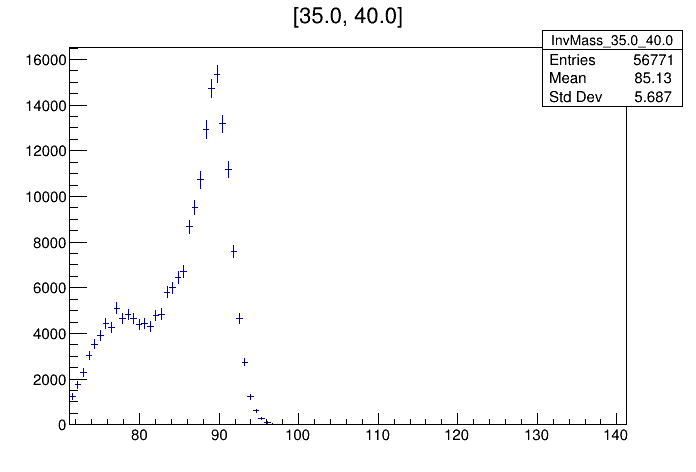

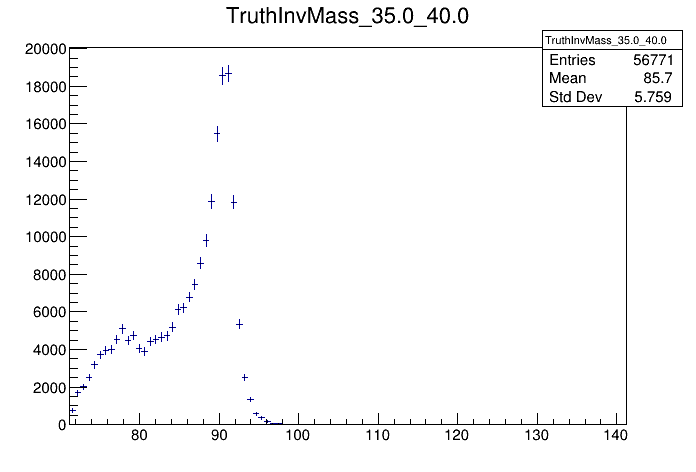

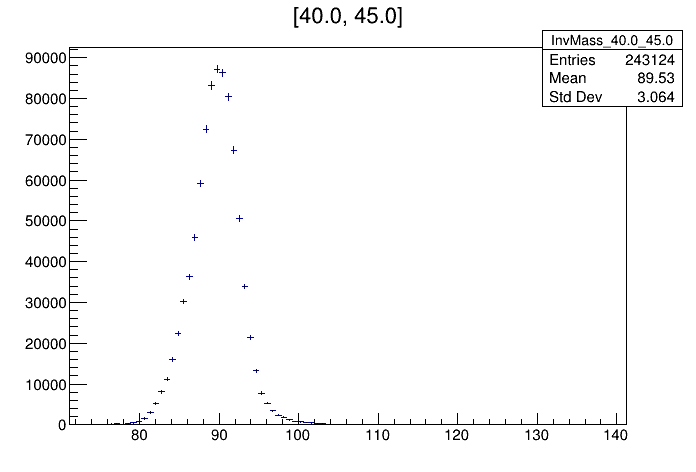

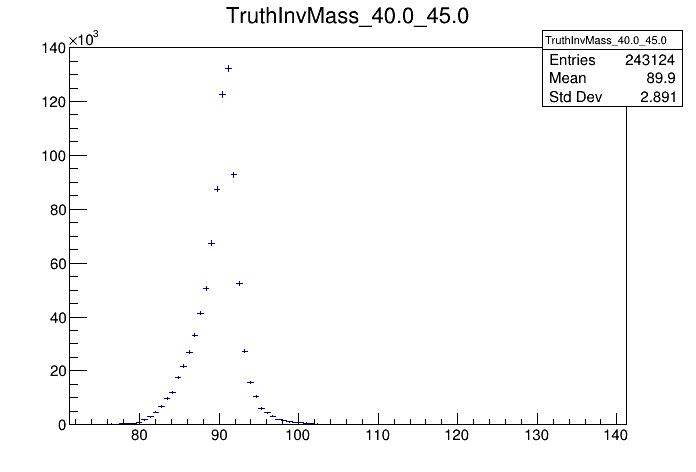

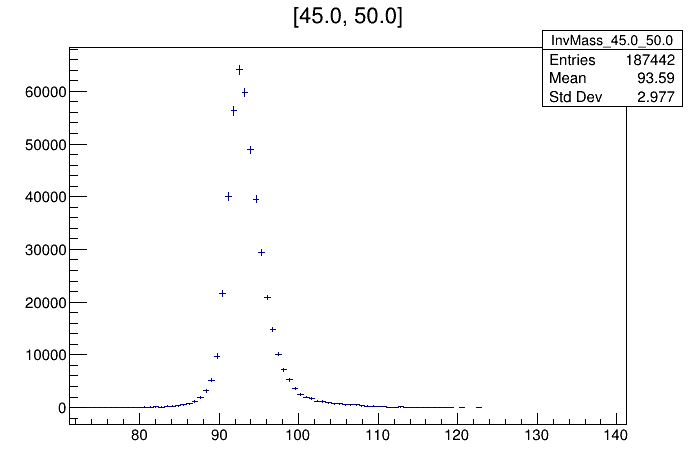

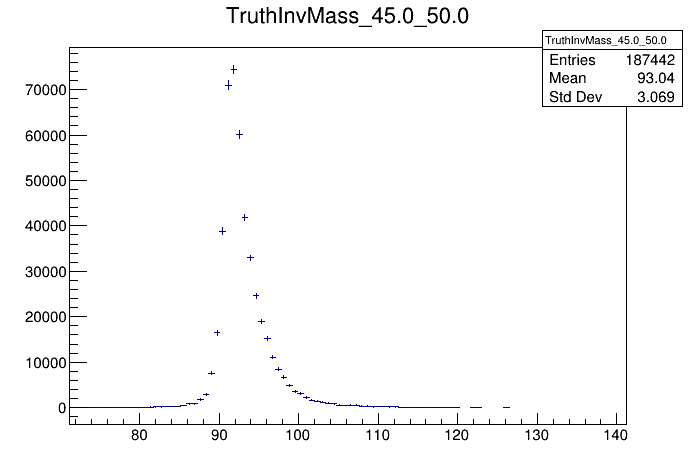

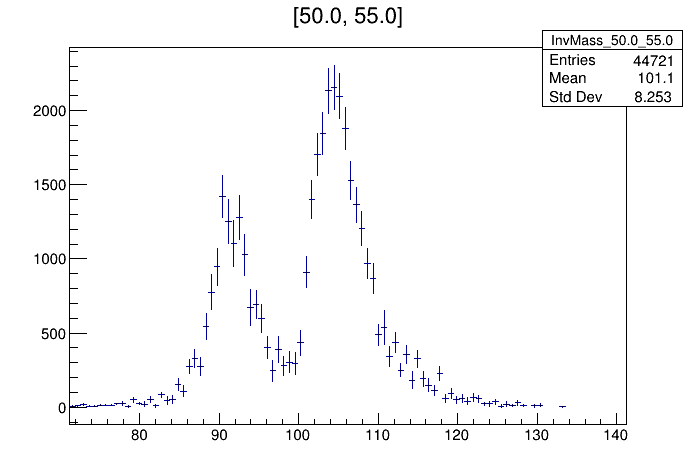

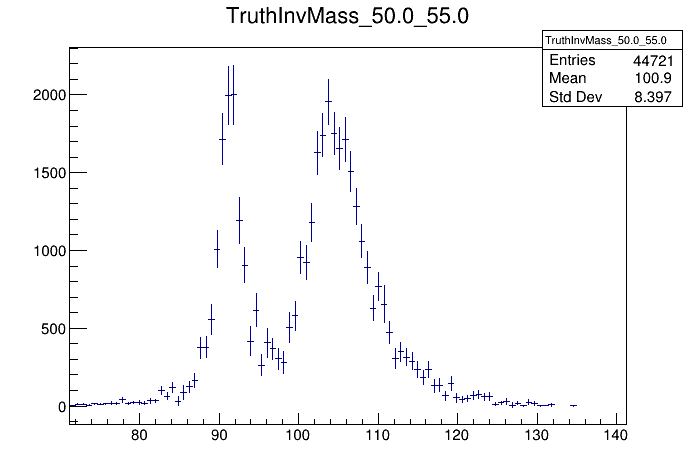

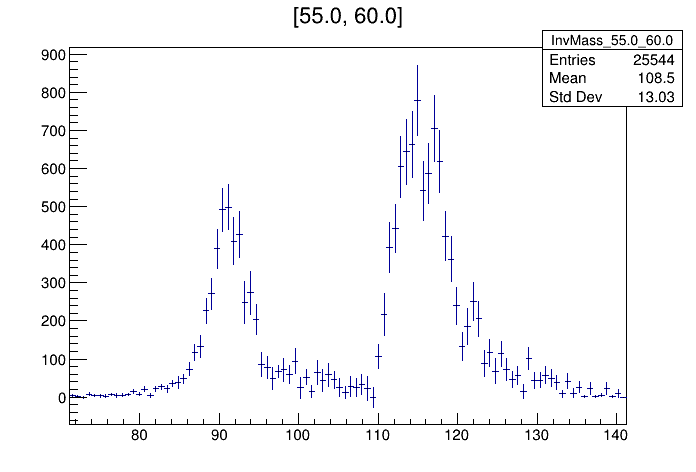

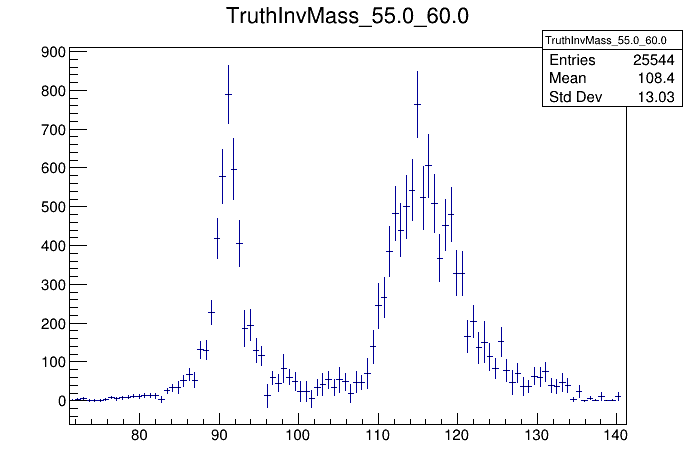

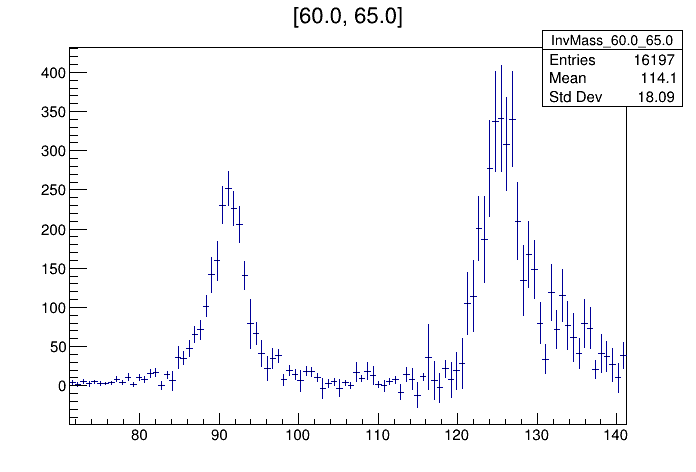

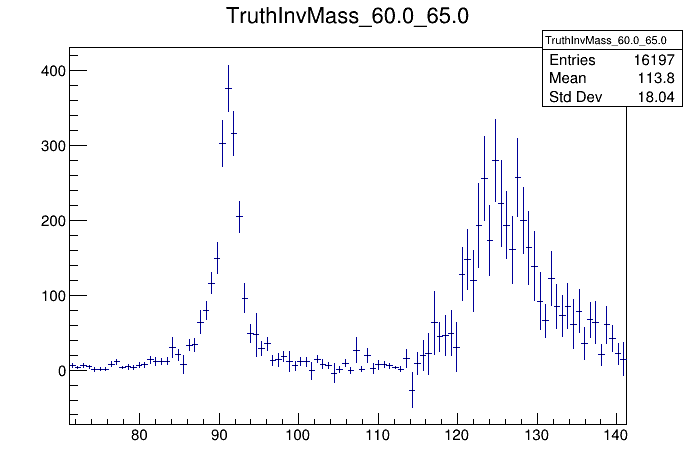

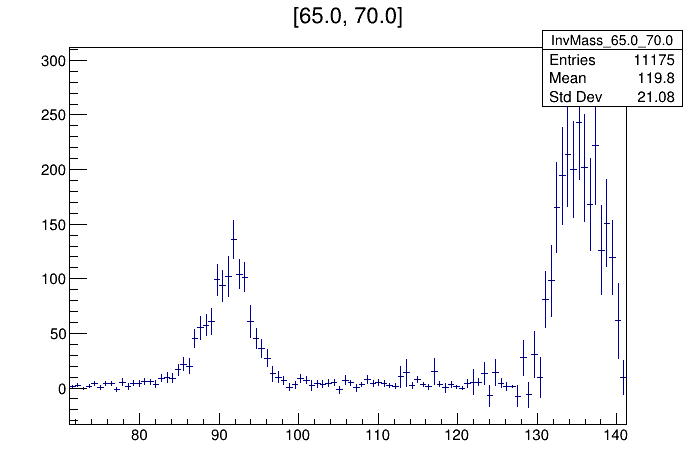

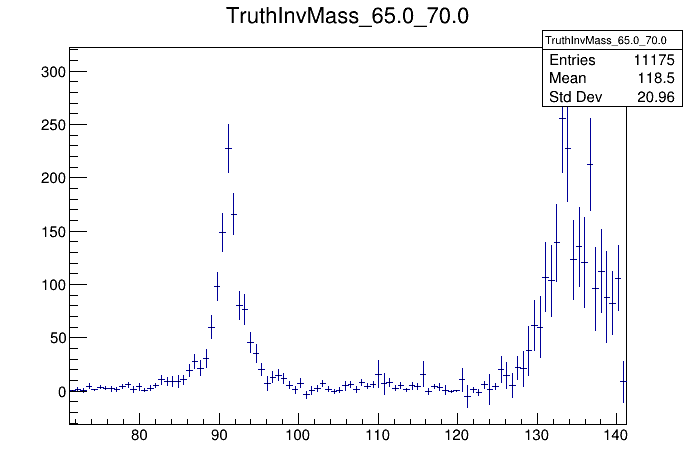

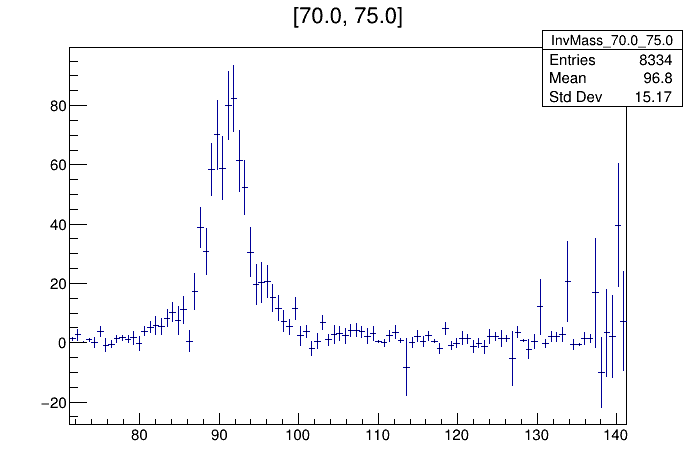

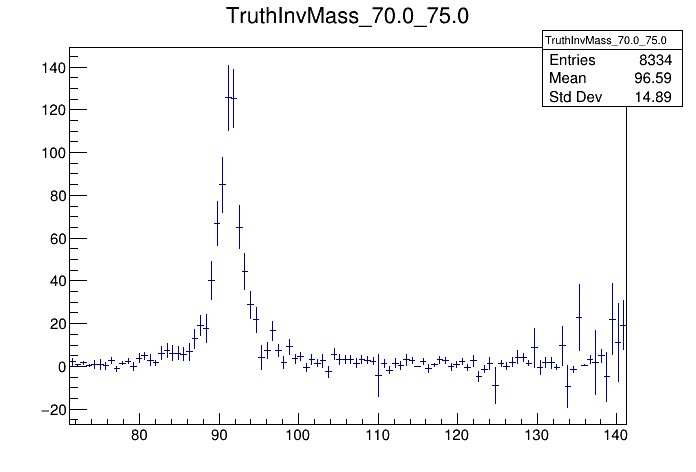

In [50]:
from atlasplots import atlas_style as astyle
#astyle.SetAtlasStyle()
canvases = []
histograms = []
for subframe, low, high in zip(subframes, binnings[:-1], binnings[1:]):
    weights = subframe.eval("weight").values
    
    invmass = subframe.eval("Muons_Minv_MuMu").values
    truthmass = subframe.eval("Truth_Minv_MuMu").values
    
    canvas = ROOT.TCanvas("canvas_{}_{}".format(low, high), "canvas_{}_{}".format(low, high))
    hist = ROOT.TH1D("InvMass_{}_{}".format(low, high), "InvMass_{}_{}".format(low, high), 100, low_sel, high_sel)
    print("[{}, {}]".format(low, high))
    hist.SetTitle("[{}, {}]".format(low, high))
    rnp.fill_hist(hist, invmass, weights)
    hist.Draw("E")

    canvas2 = ROOT.TCanvas("canvas2_{}_{}".format(low, high), "canvas2_{}_{}".format(low, high))
    truth_invmass = subframe.eval("Truth_Minv_MuMu").values
    hist2 = ROOT.TH1D("TruthInvMass_{}_{}".format(low, high), "TruthInvMass_{}_{}".format(low, high), 100, low_sel, high_sel)
    print("[{}, {}]".format(low, high))
    hist.SetTitle("[{}, {}]".format(low, high))
    rnp.fill_hist(hist2, truthmass, weights)
    hist2.Draw("E")
    
    histograms.append(hist)
    histograms.append(hist2)
    canvas.Draw()
    canvas2.Draw()
    canvases.append(canvas)
    canvases.append(canvas2)

56771
[[83.25518798828125 76.70926666259766 77.21934509277344 ...
  89.95101165771484 81.63050079345703 85.42919158935547]
 [4.728341579437256 9.856184005737305 9.551472663879395 ...
  7.577037334442139 4.3518900871276855 8.116950035095215]]
[83.25518798828125 76.70926666259766 77.21934509277344 ...
 89.95101165771484 81.63050079345703 85.42919158935547]
[35.0, 40.0]
243124
[[93.87393188476562 89.85076141357422 91.23005676269531 ...
  90.69654846191406 92.10330963134766 73.59385681152344]
 [3.361631155014038 14.836400032043457 5.516573429107666 ...
  28.42763328552246 55.39603042602539 52.88881301879883]]
[93.87393188476562 89.85076141357422 91.23005676269531 ...
 90.69654846191406 92.10330963134766 73.59385681152344]
[40.0, 45.0]
187442
[[94.33914184570312 90.7340087890625 88.4102554321289 ...
  90.26466369628906 90.29766845703125 82.92940521240234]
 [16.820667266845703 20.262378692626953 44.45946502685547 ...
  21.156675338745117 23.957216262817383 47.3421745300293]]
[94.339141845703

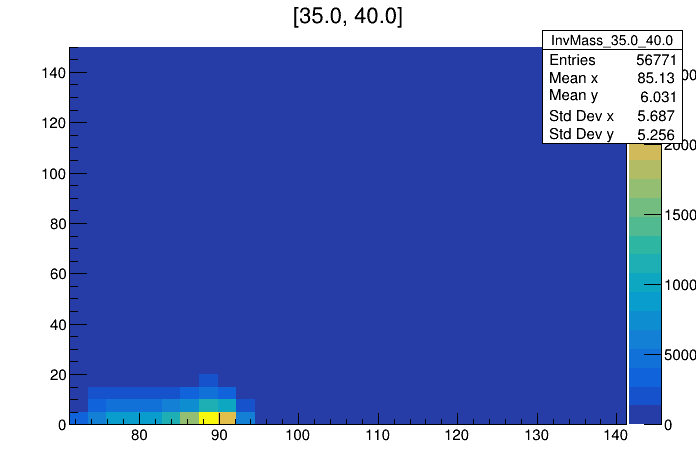

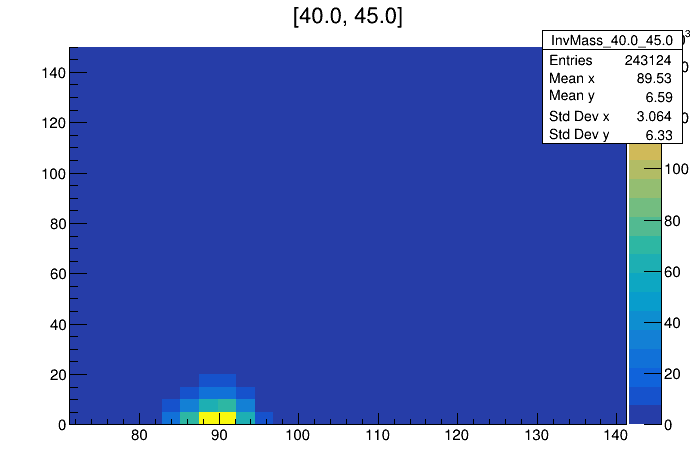

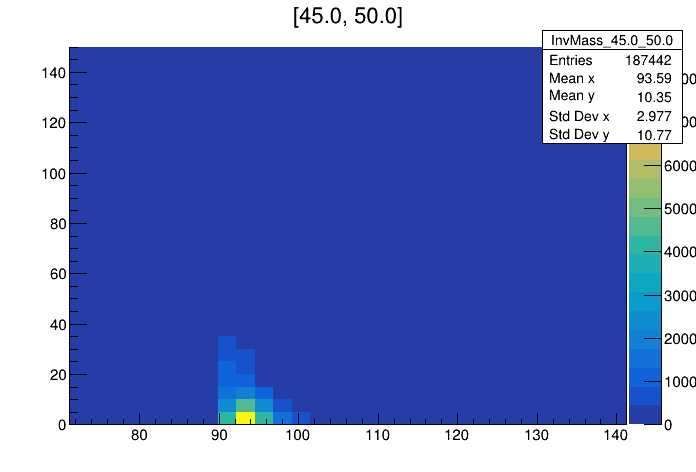

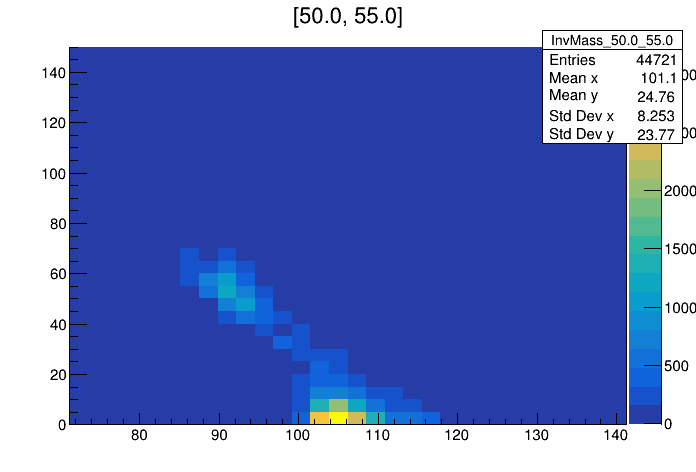

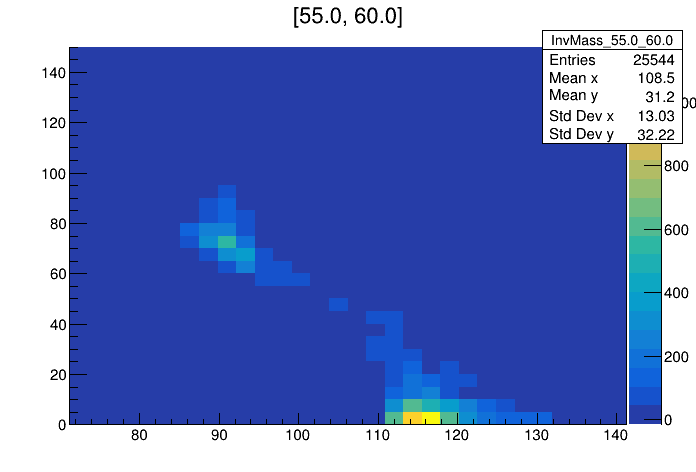

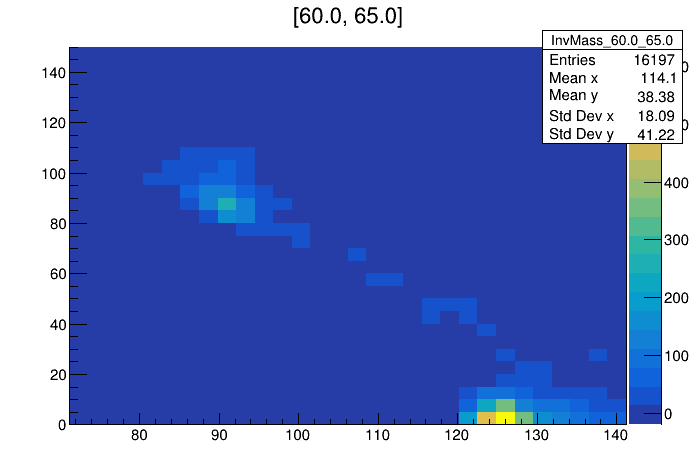

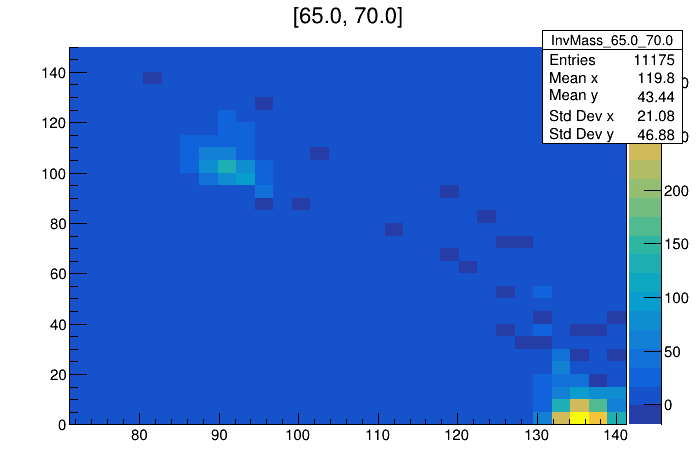

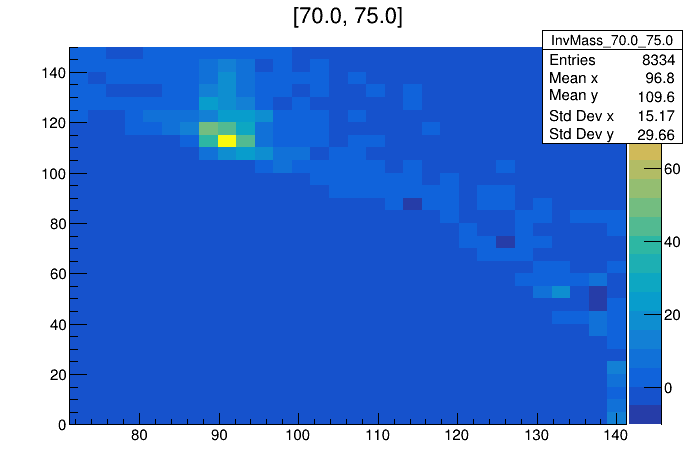

In [52]:
from atlasplots import atlas_style as astyle
#astyle.SetAtlasStyle()
canvases = []
histograms = []
for subframe, low, high in zip(subframes, binnings[:-1], binnings[1:]):
    weights = subframe.eval("weight").values   
    invmass_tmp = subframe.eval("Muons_Minv_MuMu,Z_PT")

    length = invmass_tmp.shape[1]
    print(length)
    print(invmass_tmp)
    print(invmass_tmp[0,:])
    invmass = np.zeros((length, 2))
    invmass[:,0] = invmass_tmp[0,:]
    invmass[:,1] = invmass_tmp[1,:]
    #pts = subframe.eval("Z_PT").values
    
    canvas = ROOT.TCanvas("canvas_{}_{}".format(low, high), "canvas_{}_{}".format(low, high))
    hist = ROOT.TH2D("InvMass_{}_{}".format(low, high), "InvMass_{}_{}".format(low, high), 30, low_sel, high_sel, 30, 0.0, 150.0)
    print("[{}, {}]".format(low, high))
    hist.SetTitle("[{}, {}]".format(low, high))
    rnp.fill_hist(hist, invmass, weights)
    hist.Draw("ColZ")
    canvas.Draw()
    canvases.append(canvas)
    histograms.append(hist)
